## # Perceptron

### <p style="color:Tomato">SLP<p/><hr/>

#### <p style="color:Gray">AND gate <p/>
http://blog.daum.net/to302/54
<img src = "andgate.png" width= 200, height=200>

In [30]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = w1*x1 + w2*x2
    if tmp <= theta:
        return 0
    else:
        return 1

In [31]:
AND(0, 0)

0

In [32]:
AND(1,0)

0

In [33]:
AND(0,1)

0

In [34]:
AND(1,1)

1

#### <p style="color:Gray">bias를 고려한 논리회로 구현 <p/>

In [35]:
import numpy as np

In [36]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [37]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = AND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


#### <p style="color:Gray">NAND gate <p/>

In [38]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [39]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = NAND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


#### <p style="color:Gray">OR gate <p/>

In [40]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([1.0, 1.0])
    b = -0.5
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [41]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = OR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


## # Limitations of the perceptron
https://www.packtpub.com/mapt/book/big_data_and_business_intelligence/9781783988365/8/ch08lvl1sec59/limitations-of-the-perceptron

### <p style="color:Tomato">MLP<p/><hr/>
계층 한개로는 못 풀던 문제를 풀게 되었다.

In [42]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [43]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


## # Neural network
https://appliedgo.net/perceptron/
<img src="neuralnetwork.png" width=200 height=200>
https://stevenmiller888.github.io/mind-how-to-build-a-neural-network/

### <p style="color:Tomato">Activation Function<p/><hr/>

#### <p style="color:Gray">step function<p/>

In [44]:
import matplotlib.pylab as plt

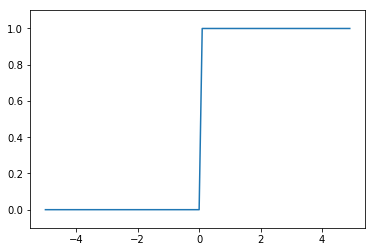

In [45]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)
X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1) # range of axis y
plt.show()

In [46]:
%matplotlib inline

In [47]:
def step_fuction(x):
    if x>0:
        return 1
    else:
        return 0

In [48]:
step_function(0.4)

array(1)

In [49]:
step_function(np.array([1.0, 2.0]))

array([1, 1])

In [50]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [51]:
step_function(np.array([1.0, 2.0]))

array([1, 1])

In [52]:
x = np.array([1.0, 2.0])
x > 0
# x > [0, 0] # atomatically broadcast

array([ True,  True], dtype=bool)

In [53]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

In [54]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

(-0.1, 1.1)

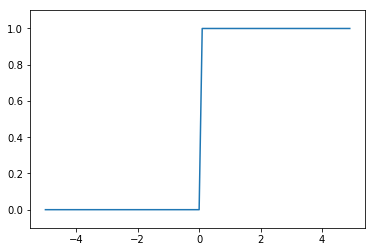

In [55]:
plt.plot(x, y)
plt.ylim(-0.1, 1.1)

#### <p style="color:Gray">sigmoid function<p/>

In [56]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

(-0.1, 1.1)

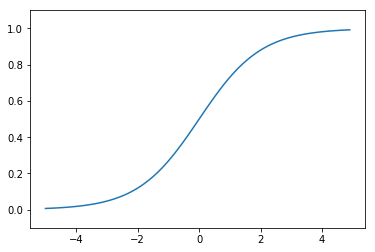

In [57]:
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)

차이점
* 모양
* 출력값

공통점 
* 작은 입력 -> 출력 0
* 큰 입력 -> 출력 1
* 출력값 범위
* 비선형

신경망에서 활성화 함수는 **비선형 함수**이어야 한다.


#### <p style="color:Gray">Rectified Linear Unit function(ReLU)<p/>

In [59]:
def relu(x):
    return np.maximum(0,x)

(-0.1, 5.0)

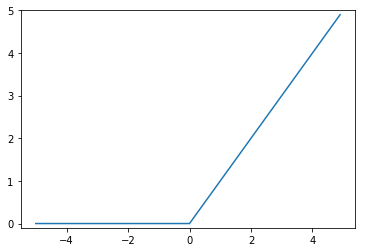

In [60]:
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 5.0)

#### <p style="color:Gray">indentity function!<p/>

In [61]:
def identity_function(x):
    return x

### Signaling of each layer of neural  network

In [62]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],
              [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3]) #  random value
print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [63]:
A1 = np.dot(X, W1) + B1
print(A1)

[ 0.3  0.7  1.1]


In [64]:
type(A1)

numpy.ndarray

In [65]:
Z1 = sigmoid(A1)

type(Z1)
print(Z1)

[ 0.57444252  0.66818777  0.75026011]


In [66]:
W2 = np.array([[0.1, 0.4],
               [0.2, 0.5],
               [0.3, 0.6]]) # 지금은 weight값을 직접 주고 있지만
# 나중에는 알아서 정해지도록 
B2 = np.array([0.1, 0.2])

In [67]:
A2 = np.dot(Z1, W2) + B2
print(A2)

[ 0.51615984  1.21402696]


In [68]:
Z2 = sigmoid(A2)
print(Z2)

[ 0.62624937  0.7710107 ]


In [69]:
W3 = np.array([[0.1, 0.3],
               [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
print(A3)

[ 0.31682708  0.69627909]


In [70]:
Y = identity_function(A3)
print(Y)

[ 0.31682708  0.69627909]


### 앞서 수행한 내용 정리

In [71]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],
                              [0.2, 0.4, 0.6]])
    network['B1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4],
                             [0.2, 0.5],
                             [0.3, 0.6]])
    network['B2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3],
                             [0.2, 0.4]])
    network['B3'] = np.array([0.1, 0.2])

    return network

In [72]:
def forward(network,x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['B1'], network['B2'], network['B3']
    
    A1 = np.dot(X, W1) + B1
    Z1 = sigmoid(A1)
    A2 = np.dot(Z1, W2) + B2
    Z2 = sigmoid(A2)
    A3 = np.dot(Z2, W3) + B3
    Y = identity_function(A3)
    
    return Y

In [73]:
network = init_network()
network

{'B1': array([ 0.1,  0.2,  0.3]),
 'B2': array([ 0.1,  0.2]),
 'B3': array([ 0.1,  0.2]),
 'W1': array([[ 0.1,  0.3,  0.5],
        [ 0.2,  0.4,  0.6]]),
 'W2': array([[ 0.1,  0.4],
        [ 0.2,  0.5],
        [ 0.3,  0.6]]),
 'W3': array([[ 0.1,  0.3],
        [ 0.2,  0.4]])}

In [74]:
X = np.array([1.0, 0.5])
Y = forward(network, X)

In [75]:
print(Y)

[ 0.31682708  0.69627909]


# # 출력층 설계

### <p style="color:Tomato">신경망 출력층의 활성화 함수<p/><hr/>

#### <p style="color:Gray">softmax function<p/>

In [76]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(a)
print(exp_a)

[ 0.3  2.9  4. ]
[  1.34985881  18.17414537  54.59815003]


In [77]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542102


In [78]:
y = exp_a / sum_exp_a # 항상 1을 넘지 않는다. 다 더해서 그 값으로 각각을 나눈다. 
print(y) # 3번째 값이 될 활률이 73.65%

[ 0.01821127  0.24519181  0.73659691]


In [79]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.array(exp_a)
    y = exp_a / sum_exp_a
    
    return y

* (noted)<a style="color:Gray">softmax func<a/>

In [80]:
a = np.array([0.3, 2.9, 4.0, 10.0, 1000.0])
exp_a = np.exp(a)
print(a)
print(exp_a)

[  3.00000000e-01   2.90000000e+00   4.00000000e+00   1.00000000e+01
   1.00000000e+03]
[  1.34985881e+00   1.81741454e+01   5.45981500e+01   2.20264658e+04
              inf]


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [81]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

inf


In [82]:
y = exp_a / sum_exp_a 
print(y) 

[  0.   0.   0.   0.  nan]


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


inf: unlimited

In [83]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([ nan,  nan,  nan])

In [84]:
c = np.max(a)

In [85]:
a - c

array([  0, -10, -20])

In [86]:
np.exp(a - c) / np.sum(np.exp(a-c))

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

In [87]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [88]:
a = np.array([1010, 1000, 990])
y = softmax(a)
y

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

In [89]:
np.sum(y)

1.0

#### <p style="color:Gray">출력층의 뉴런 수 정하기<p/>

In [90]:
pwd

'C:\\pydev\\deep-learning-from-scratch-master'

In [91]:
cd ch03

C:\pydev\deep-learning-from-scratch-master\ch03


In [92]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [93]:
cd ..

C:\pydev\deep-learning-from-scratch-master


In [94]:
from dataset.mnist import load_mnist

In [95]:
cd ch03

C:\pydev\deep-learning-from-scratch-master\ch03


In [96]:
import mnist_show

5
(784,)
(28, 28)


In [97]:
import importlib

In [98]:
importlib.reload(mnist_show)

5
(784,)
(28, 28)


<module 'mnist_show' from 'C:\\pydev\\deep-learning-from-scratch-master\\ch03\\mnist_show.py'>

In [99]:
import neuralnet_mnist

Accuracy:0.9352


In [100]:
network = neuralnet_mnist.init_network()

In [101]:
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

### 테스트 이미지를 입력해서 실제로 잘 판단하는지 확인

In [102]:
pwd

'C:\\pydev\\deep-learning-from-scratch-master\\ch03'

In [103]:
import numpy as np
import neuralnet_mnist
import mnist_show
from dataset.mnist import load_mnist

In [105]:
x_test.shape

(10000, 784)

In [106]:
import importlib
importlib.reload(mnist_show)

5
(784,)
(28, 28)


<module 'mnist_show' from 'C:\\pydev\\deep-learning-from-scratch-master\\ch03\\mnist_show.py'>

In [110]:
(_, _), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
# _, (x_test, t_test)

# test할 이미지를 눈으로 확인
img = x_test[1234]
label = t_test[1234]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

mnist_show.img_show(img)

8
(784,)
(28, 28)


In [111]:
network = neuralnet_mnist.init_network()
x_test, t_test = neuralnet_mnist.get_data()
y = neuralnet_mnist.predict(network, x_test[1234])
p = np.argmax(y)
print(y)
print(p)

[  4.29687873e-02   2.92095210e-04   1.64978951e-02   4.31496873e-02
   5.08766447e-04   4.02760804e-01   1.53715734e-03   2.97681490e-05
   4.91263092e-01   9.91893234e-04]
8


이 이미지가 0일 확률은 42% 이다. 
이 이미지가 6일 확률은?? 99%이다. 

img = x_test[1234]
label = t_test[1234]는 8이 나왔다. 8일 확률이 -01로 5도 -01로 확률이 높지만 8이 더 높다.

### 신경망 각 층의 배열 형상(shape)

In [112]:
x, _ = neuralnet_mnist.get_data()

In [115]:
network = neuralnet_mnist.init_network()

In [116]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [117]:
print(x.shape)
print(x[0].shape) # 벡터로 나타낸다.
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


#### <p style="color:Gray">batch processing<p/>
* 이미지 여러 장을 입력하는 경우
* 데이터를 효율적이고 빠르게 처리 가능
    * 수치 계산 라이브러리가 큰 배열을 효율적으로 처리할 수 있도록 고도로 처적화되었기 때문
    * 배치 처리를 통해 I/O 횟수가 줄어들어 빠른 CPU 또는 GPU로 순수 계산하는 비율이 높아짐
<img src="batchprocessing.png" width= 400, height=400>

In [119]:
import importlib

In [120]:
importlib.reload(neuralnet_mnist)

Accuracy:0.9352


<module 'neuralnet_mnist' from 'C:\\pydev\\deep-learning-from-scratch-master\\ch03\\neuralnet_mnist.py'>

배치처리

In [122]:
import neuralnet_mnist_batch

Accuracy:0.9352


In [123]:
importlib.reload(neuralnet_mnist_batch)

Accuracy:0.9352


<module 'neuralnet_mnist_batch' from 'C:\\pydev\\deep-learning-from-scratch-master\\ch03\\neuralnet_mnist_batch.py'>